# Projeto - WebScraping no Yahoo Finance e Automatização do envio de e-mails

#### Cenário: Empresa de investimentos.

#### Projeto: enviar análises solicitadas por e-mail.

###### Antes -> [Entrar no site Yahoo Finance // Selecionar ação // Selecionar período // Fazer o download // Montar análises // Preparar e-mail // Enviar e-mail. ]

###### Depois -> [Rodar o sistema // Escolher a ação. ]

#### Passo a passo do problema: 
    # Buscar as informações da ação automaticamente;
    # Criar análises solicitadas;
        # Cotação máxima;
        # Cotação mínima;
        # Valor médio;
    # Enviar um e-mail automaticamente para o gestor.

#### Instalar bibliotecas (yfinance e matplotlib)

In [6]:
# "%pip install yfinance"
# "%pip install matplotlib"
# Depois, "%pip install pyautogui"


In [1]:
#importando o yfinance
import yfinance

In [4]:
ticker = input("Digite o código da ação desejada: ")
dt_inicial = input("Digite a data inicial (aaaa-mm-dd): ")
dt_final = input("Digite a data final (aaaa-mm-dd): ")
dados = yfinance.Ticker(ticker)
tabela = dados.history(start=dt_inicial,end=dt_final)
tabela


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-03:00,32.981615,33.378030,32.946381,33.281128,24043800,0.0,0.0
2024-01-03 00:00:00-03:00,33.298748,34.461561,33.184227,34.320614,52300200,0.0,0.0
2024-01-04 00:00:00-03:00,34.461560,34.664171,33.924198,34.029911,45344900,0.0,0.0
2024-01-05 00:00:00-03:00,34.241332,34.479180,33.836110,34.109196,35783700,0.0,0.0
2024-01-08 00:00:00-03:00,33.809680,33.853725,33.131372,33.853725,35158100,0.0,0.0
2024-01-09 00:00:00-03:00,34.065142,34.135618,33.501355,33.563019,27279000,0.0,0.0
2024-01-10 00:00:00-03:00,33.563020,33.712778,33.043278,33.254700,27382000,0.0,0.0
2024-01-11 00:00:00-03:00,33.457312,33.607070,33.210655,33.536594,26564400,0.0,0.0
2024-01-12 00:00:00-03:00,33.915388,34.117999,33.624683,33.624683,24479500,0.0,0.0


<Axes: xlabel='Date'>

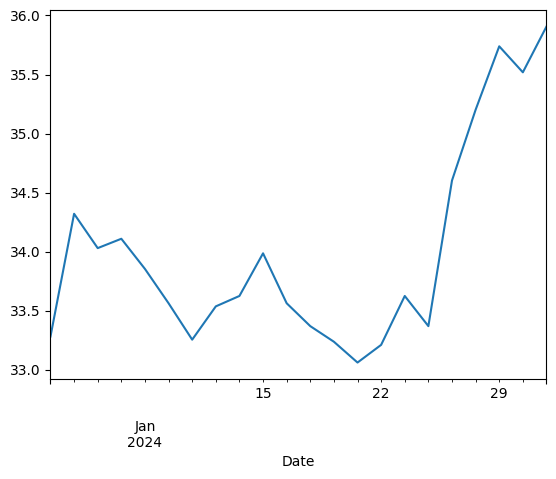

In [5]:
fechamento=tabela.Close
fechamento

fechamento.plot()

#### Criar as análises solicitadas: Cotações máximas, mínimas, valores médios e uso de round para diminuição de casas decimais.

In [6]:
maxima = round(fechamento.max(), 2)
minima = round(fechamento.min(), 2)
media = round(fechamento.mean(), 2)

print(maxima)
print(minima)
print(media)

35.91
33.06
34.0


#### Enviar o e-mail automaticamente
##### Instalar 'pyautogui', 'pyperclip' e 'webbrowser' sendo que as 2 últimas não precisam ser instaladas, a primeira pois foi instalada junto com pyautogui

In [46]:
import pyautogui
import pyperclip
import webbrowser
from time import sleep

#destinatario = "@gmail.com"
assunto = "Análises Projeto 2024"

mensagem = f"""
Bom dia, 

Segue abaixo as análises da ação {ticker} do período solicitado: {dt_inicial} a {dt_final}:

Cotação máxima: R${maxima}
Cotação mínima: R${minima}
Valor médio: R${media}
"""

#configurar pausa entre ações do pyautogui.
pyautogui.PAUSE = 3

# abrir o navegador e ir ao g-mail
webbrowser.open("www.gmail.com")
sleep(3)

# clicar no botão Escrever
pyautogui.click(x=82, y=197)

# Preencher Para 
pyperclip.copy(destinatario)
pyautogui.hotkey("ctrl","v")
pyautogui.hotkey("tab")

# Preencher assunto
pyperclip.copy(assunto)
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# Preencher corpo do e-mail
pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl","v")

# Clicar no botão enviar
pyautogui.click(x=1324, y=990)

# Fechar a aba
pyautogui.hotkey("alt","f4")

print("E-mail enviado com sucesso!")


# 


E-mail enviado com sucesso!


In [45]:
# Obtendo as coordenadas na tela
import time
import pyautogui

time.sleep(5)
print(pyautogui.position())

# Botão escrever: x=82, y=197
# Botão enviar: x=1324, y=990

Point(x=1324, y=990)
